In [13]:
# https://docs.google.com/presentation/d/1A95YqjHMGJnEQdnCw4BQknhhEqAl9EUROupWtPXfZRw/edit?slide=id.g3b1c826d108_0_213#slide=id.g3b1c826d108_0_213 

In [1]:
import polars as pl 
import sys
from pathlib import Path
import importlib
import matplotlib.pyplot as plt
from collections import Counter

# Set the font family to Arial
# https://g.co/gemini/share/3898a74b2d77
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial'] # Add Arial to the sans-serif list

plt.rcParams.update({
    'font.size': 20,
})

REPO_DIR = Path("/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry")
sys.path.append(str(REPO_DIR / "src" / "util"))
sys.path.append(f"{REPO_DIR}/src") 

pl.Config.set_tbl_rows(10) 

polars.config.Config

## Read pre-computed difference of haplotype-specific methylations for all samples 

In [2]:
from read_data import read_dataframe_from_bed

def read_all_samples(bed): 
    df = read_dataframe_from_bed(bed)
    return df

DF_DELTA_METH_ALL_SAMPLES = read_all_samples('delta_meth_all_samples.bed')
print(len(DF_DELTA_METH_ALL_SAMPLES))
DF_DELTA_METH_ALL_SAMPLES.sample(10)

2903221


chrom,start,end,NA12877_num_cpgs,NA12877_num_valid_cpgs,NA12877_num_valid_cpgs_pat,NA12877_num_valid_cpgs_mat,NA12877_count,NA12877_model,NA12878_num_cpgs,NA12878_num_valid_cpgs,NA12878_num_valid_cpgs_pat,NA12878_num_valid_cpgs_mat,NA12878_count,NA12878_model,NA12887_num_cpgs,NA12887_num_valid_cpgs,NA12887_num_valid_cpgs_pat,NA12887_num_valid_cpgs_mat,NA12887_count,NA12887_model,NA12885_num_cpgs,NA12885_num_valid_cpgs,NA12885_num_valid_cpgs_pat,NA12885_num_valid_cpgs_mat,NA12885_count,NA12885_model,NA12883_num_cpgs,NA12883_num_valid_cpgs,NA12883_num_valid_cpgs_pat,NA12883_num_valid_cpgs_mat,NA12883_count,NA12883_model,NA12881_num_cpgs,NA12881_num_valid_cpgs,NA12881_num_valid_cpgs_pat,NA12881_num_valid_cpgs_mat,…,200087_model,200101_num_cpgs,200101_num_valid_cpgs,200101_num_valid_cpgs_pat,200101_num_valid_cpgs_mat,200101_count,200101_model,200102_num_cpgs,200102_num_valid_cpgs,200102_num_valid_cpgs_pat,200102_num_valid_cpgs_mat,200102_count,200102_model,200103_num_cpgs,200103_num_valid_cpgs,200103_num_valid_cpgs_pat,200103_num_valid_cpgs_mat,200103_count,200103_model,200104_num_cpgs,200104_num_valid_cpgs,200104_num_valid_cpgs_pat,200104_num_valid_cpgs_mat,200104_count,200104_model,200105_num_cpgs,200105_num_valid_cpgs,200105_num_valid_cpgs_pat,200105_num_valid_cpgs_mat,200105_count,200105_model,200106_num_cpgs,200106_num_valid_cpgs,200106_num_valid_cpgs_pat,200106_num_valid_cpgs_mat,200106_count,200106_model
str,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,…,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64
"""chr14""",98303000,98304000,6,6,6,6,-0.028667,-0.008833,6,6,6,6,-0.038667,-0.04,6,6,6,6,0.091833,0.044833,6,6,6,6,0.049,-0.003333,6,6,6,6,-0.001333,-0.025333,6,6,6,6,…,-0.0195,6,6,6,6,0.0115,0.018,6,6,6,6,-0.0855,-0.013,6,6,6,6,-0.029167,-0.029667,6,6,6,6,-0.012833,-0.009833,6,6,6,6,-0.069167,-0.036333,6,6,6,6,-0.0315,-0.039667
"""chr7""",40028000,40029000,8,8,8,8,-0.04,-0.02725,8,8,8,8,0.034125,0.007875,8,8,8,8,-0.06575,0.01325,8,8,8,8,-0.00825,0.00275,8,8,8,8,-0.065875,-0.015875,8,8,8,8,…,null,8,8,8,8,-0.063375,-0.01375,8,8,8,8,-0.028125,0.006125,8,8,8,8,0.018375,0.002,8,8,8,8,-0.014375,0.00125,8,8,8,8,0.02975,0.03825,8,8,8,8,0.091625,0.08625
"""chr10""",67706000,67707000,1,1,1,1,-0.082,-0.049,1,1,0,0,null,null,1,1,0,0,null,null,1,1,0,0,null,null,1,1,0,0,null,null,1,1,0,0,…,-0.236,1,1,0,0,null,null,1,1,1,1,0.0,-0.038,1,1,0,0,null,null,1,1,1,0,null,null,1,1,1,1,0.018,0.042,1,1,0,1,null,null
"""chr10""",31261000,31262000,3,3,3,3,0.053667,-0.002667,3,3,0,0,null,null,3,3,3,3,0.074667,0.023667,3,3,3,3,-0.037,0.016333,3,3,3,3,-0.11,-0.138333,3,3,3,3,…,null,3,3,0,0,null,null,3,3,3,3,0.022,-0.051,3,3,0,0,null,null,3,3,0,0,null,null,3,3,0,0,null,null,3,3,0,0,null,null
"""chr21""",27465000,27466000,21,21,21,21,0.015571,0.009286,21,21,21,21,0.009048,0.008381,21,21,21,21,0.01,0.024571,21,21,21,21,0.002667,0.005238,21,21,21,21,0.028476,0.036333,21,21,21,21,…,-0.011905,21,21,21,21,0.029333,0.002429,21,21,21,21,0.017762,0.010095,21,21,21,21,-0.027048,-0.026143,21,21,21,21,-0.035095,0.006048,21,21,21,21,-0.050524,-0.021619,21,21,21,21,-0.004952,-0.006952
"""chr4""",155748000,155749000,7,7,7,7,-0.02,-0.038143,7,7,7,7,-0.000286,-0.036571,7,7,7,7,0.044571,0.079714,7,7,7,7,0.047286,-0.005429,7,7,7,7,-0.001429,0.045571,7,7,7,7,…,null,7,7,7,7,-0.021714,-0.029,7,7,7,7,0.030714,0.011571,7,7,7,7,0.054143,0.039429,7,7,7,7,-0.049857,-0.042143,7,7,0,0,null,null,7,7,7,7,-0.113143,-0.091857
"""chr6""",113466000,113467000,6,6,6,6,-0.0245,0.03,6,6,6,6,-0.019833,-0.031333,6,6,6,6,0.0095,-0.01,6,6,6,6,0.007167,0.01,6,6,6,6,0.079,0.150167,6,6,6,6,…,0.131833,6,6,0,0,null,null,6,6,6,6,0.0555,0.043667,6,6,0,0,null,null,6,6,0,0,null,null,6,6,0,0,null,null,6,6,0,0,null,null
"""chr14""",65056000,65057000,3,3,0,0,null,null,3,3,3,3,-0.019,-0.078667,3,3,0,0,null,null,3,3

## Call candidate imprinted loci across all samples using caller developed in imprinting.2.ipynb

In [3]:
import imprinting
importlib.reload(imprinting)
from imprinting import call_imprinted_loci

DF_IMPRINTED_CANDIDATES = call_imprinted_loci(
    DF_DELTA_METH_ALL_SAMPLES, 
    meth_mode='model',
    delta_meth_threshold=0.76, 
    num_valid_cpgs_per_hap_threshold=5,
    valid_cpg_ratio_threshold=0.5
)
DF_IMPRINTED_CANDIDATES.sample(10, seed=42) 

Number of candidate imprinted loci: 207


chrom,start,end,imprinted_samples,num_imprinted_samples,locus
str,i64,i64,list[str],u32,str
"""chrX""",49235000,49236000,"[""200081""]",1,"""chrX:49235000-49236000"""
"""chr9""",42296000,42297000,"[""NA12884""]",1,"""chr9:42296000-42297000"""
"""chrX""",131822000,131823000,"[""200081""]",1,"""chrX:131822000-131823000"""
"""chrX""",30713000,30714000,"[""200081""]",1,"""chrX:30713000-30714000"""
"""chrX""",49191000,49192000,"[""200081""]",1,"""chrX:49191000-49192000"""
"""chr20""",30899000,30900000,"[""NA12877""]",1,"""chr20:30899000-30900000"""
"""chr4""",19520000,19521000,"[""NA12887"", ""NA12885"", … ""200106""]",11,"""chr4:19520000-19521000"""
"""chr20""",58840000,58841000,"[""NA12877"", ""NA12878"", … ""200106""]",18,"""chr20:58840000-58841000"""
"""chr7""",23490000,23491000,"[""NA12877"", ""NA12882"", … ""200105""]",10,"""chr7:23490000-23491000"""


## Compare candidate imprinted loci with Akbari et al 2023 truth set

In [4]:
# https://quinlangroup.slack.com/archives/C0A28NHNZHT/p1765239516136159

In [ ]:
def read_truth_set_imprinted_loci(): 
    df = (
        pl
        .read_csv(
            'Akbari2023CellGenomics.csv', 
            separator=',',
            comment_prefix=None,
            has_header=True,
            null_values="NA"
        )
        .rename({ 
            'Chromosome': 'chrom',
            'Start': 'start',
            'End': 'end',
            'Methylated allele': 'methylated_allele',
            'Name': 'genes',
            'Study(Reference #)': 'study (reference #)',
            '# of individuals could be examined': 'num_samples_examined',
            '# of individuals with partial methylation': 'num_imprinted_samples',
            '% Individuals with partial methylation': 'percent_imprinted_samples',
            '# of tissues could be examined': 'num_tissues_examined',
            '# of tissues with partial methylation': 'num_imprinted_tissues',
            '% tissues with partial methylation': 'percent_imprinted_tissues'
        })
        .with_columns(
            (pl.col('end') - pl.col('start')).alias('length')
        )
    )
    return df.select(['chrom', 'start', 'end', 'length'] + df.columns[3:-1])

DF_IMPRINTED_TRUTH = read_truth_set_imprinted_loci()
DF_IMPRINTED_TRUTH

chrom,start,end,length,methylated_allele,genes,study (reference #),num_samples_examined,num_imprinted_samples,percent_imprinted_samples,num_tissues_examined,num_imprinted_tissues,percent_imprinted_tissues
str,i64,i64,i64,str,str,str,i64,i64,f64,i64,i64,f64
"""chr1""",11501432,11501606,174,"""Maternal""","""PTCHD2""","""Hernandez(31)""",82,20,24.39,25,7,28.0
"""chr1""",21292978,21293090,112,"""Maternal""","""ECE1;LOC100506801""","""Hernandez(31)""",64,0,0.0,27,6,22.22
"""chr1""",32471178,32471396,218,"""Maternal""","""ZBTB8B""","""Joshi(30)""",81,43,53.09,25,12,48.0
"""chr1""",39515809,39516076,267,"""Maternal""","""BMP8A""","""Akbari(32)""",22,1,4.55,23,6,26.09
"""chr1""",39558940,39560069,1129,"""Maternal""","""PPIEL,PABPC4""","""Akbari(32),Court(29),Hernandez…",86,2,2.33,28,3,10.71
…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr9""",95312864,95313633,769,"""Maternal""","""FANCC,FANCC_Int1-DMR""","""Akbari(32),Hernandez(31)""",86,58,67.44,29,17,58.62
"""chr9""",97574899,97575448,549,"""Maternal""","""TMOD1""","""Akbari(32)""",82,29,35.37,27,4,14.81
"""chr9""",113088975,113090248,1273,"""Maternal""","""AL449105.5""","""Hernandez(31)""",84,6,7.14,28,5,17.86


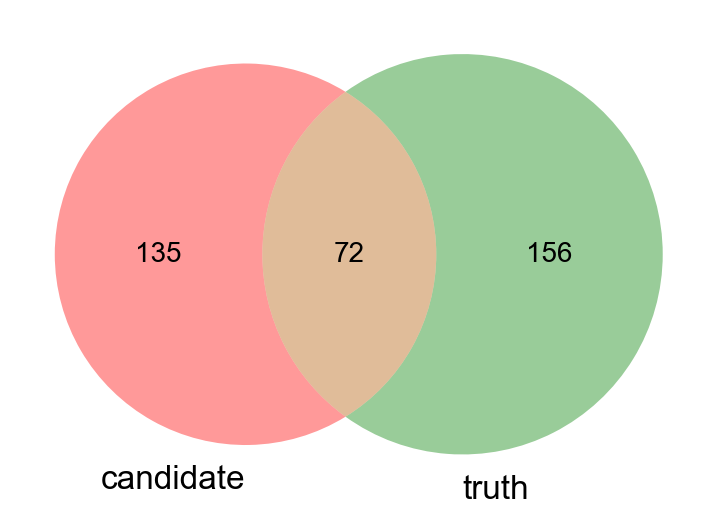

In [6]:
import find_unique_and_common_records
importlib.reload(find_unique_and_common_records)
from find_unique_and_common_records import find_unique_and_common_records_with_venn_diagram 

DF_IMPRINTED_CANDIDATES_UNIQUE, DF_IMPRINTED_TRUTH_UNIQUE, DF_IMPRINTED_COMMON = find_unique_and_common_records_with_venn_diagram(
    DF_IMPRINTED_CANDIDATES, 
    DF_IMPRINTED_TRUTH, 
    min_overlap=100, 
    labels=('candidate', 'truth')
)

### Loci common to candidate and truth sets

In [7]:
# Candidate loci recur in intersection of venn diagram because they are small and truth loci are large 
DF_IMPRINTED_COMMON.select([
    'chrom', 'start', 'end', 'num_imprinted_samples',
    'chrom_2', 'start_2', 'end_2', 'length_2',
    'overlap_len'
])

chrom,start,end,num_imprinted_samples,chrom_2,start_2,end_2,length_2,overlap_len
str,i64,i64,u32,str,i64,i64,i64,i64
"""chr1""",68050000,68051000,19,"""chr1""",68046745,68052008,5263,1000
"""chr2""",206250000,206251000,11,"""chr2""",206249709,206274051,24342,1000
"""chr2""",206251000,206252000,6,"""chr2""",206249709,206274051,24342,1000
"""chr2""",206252000,206253000,2,"""chr2""",206249709,206274051,24342,1000
"""chr2""",206256000,206257000,2,"""chr2""",206249709,206274051,24342,1000
…,…,…,…,…,…,…,…,…
"""chr20""",58855000,58856000,14,"""chr20""",58850116,58856591,6475,1000
"""chr20""",58856000,58857000,15,"""chr20""",58850116,58856591,6475,591
"""chr20""",58888000,58889000,17,"""chr20""",58887966,58890443,2477,1000


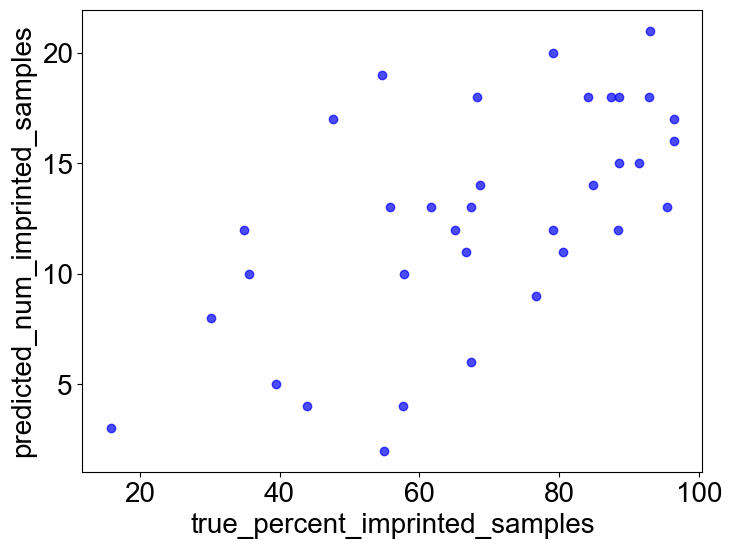

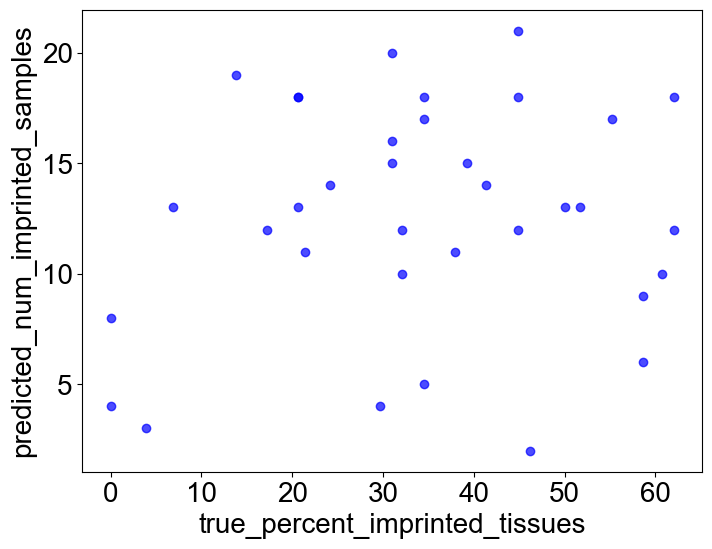

In [8]:
def correlate_polymorphicity(df): 
    truth_cols = df.columns[6:-2]
    df = ( 
        df
        .group_by(truth_cols)
        .agg([
            pl.col("num_imprinted_samples").max().alias("max_num_imprinted_samples_in_candidate_set")
        ])
        .sort(['chrom_2', 'start_2', 'end_2'])
        .select(['percent_imprinted_samples_2', 'percent_imprinted_tissues_2', 'max_num_imprinted_samples_in_candidate_set'])
        .rename({
            'percent_imprinted_samples_2': 'true_percent_imprinted_samples',
            'percent_imprinted_tissues_2': 'true_percent_imprinted_tissues',
            'max_num_imprinted_samples_in_candidate_set': 'predicted_num_imprinted_samples'
        })
    )
    plt.figure(figsize=(8, 6)) 
    plt.scatter(df['true_percent_imprinted_samples'], df['predicted_num_imprinted_samples'], alpha=0.7, color='blue')
    plt.xlabel('true_percent_imprinted_samples')
    plt.ylabel('predicted_num_imprinted_samples')
    plt.show()

    plt.figure(figsize=(8, 6)) 
    plt.scatter(df['true_percent_imprinted_tissues'], df['predicted_num_imprinted_samples'], alpha=0.7, color='blue')
    plt.xlabel('true_percent_imprinted_tissues')
    plt.ylabel('predicted_num_imprinted_samples')
    plt.show()

# imprinted loci common to candidate and truth sets tend to be imprinted in the same fraction of individuals in both sets 
correlate_polymorphicity(DF_IMPRINTED_COMMON)

In [9]:
# Majority of candidate loci that are found in the truth set are predicted to be methylated on maternal haplotype  
Counter(DF_IMPRINTED_COMMON['methylated_allele_2'].to_numpy())

Counter({'Maternal': 56, 'Paternal': 16})

In [10]:
# All of these were validated in IGV
DF_IMPRINTED_COMMON.sample(10, seed=42)

chrom,start,end,imprinted_samples,num_imprinted_samples,locus,chrom_2,start_2,end_2,length_2,methylated_allele_2,genes_2,study (reference #)_2,num_samples_examined_2,num_imprinted_samples_2,percent_imprinted_samples_2,num_tissues_examined_2,num_imprinted_tissues_2,percent_imprinted_tissues_2,overlap_len,locus_candidate
str,i64,i64,list[str],u32,str,str,i64,i64,i64,str,str,str,f64,f64,f64,f64,f64,f64,i64,str
"""chr19""",56837000,56838000,"[""NA12877"", ""NA12885"", … ""200101""]",9,"""chr19:56837000-56838000""","""chr19""",56837125,56841903,4778,"""Maternal""","""PEG3,MIMT1,ZIM2,PEG3""","""Akbari(32),Court(29),Hernandez…",85.0,79.0,92.94,29.0,13.0,44.83,875,"""chr19:56837000-56838000"""
"""chr7""",130491000,130492000,"[""NA12877"", ""NA12878"", … ""200105""]",13,"""chr7:130491000-130492000""","""chr7""",130489758,130494547,4789,"""Maternal""","""MEST,MESTIT1""","""Akbari(32),Court(29),Hernandez…",86.0,82.0,95.35,29.0,15.0,51.72,1000,"""chr7:130491000-130492000"""
"""chr20""",58850000,58851000,"[""200081""]",1,"""chr20:58850000-58851000""","""chr20""",58850116,58856591,6475,"""Maternal""","""GNAS-AS1,GNAS,GNAS-XL""","""Akbari(32),Court(29),Hernandez…",87.0,77.0,88.51,29.0,6.0,20.69,884,"""chr20:58850000-58851000"""
"""chr18""",80148000,80149000,"[""NA12877"", ""NA12887"", … ""200106""]",12,"""chr18:80148000-80149000""","""chr18""",80147168,80149255,2087,"""Maternal""","""ADNP2,PARD6G-AS1""","""Akbari(32),Zink(6)""",86.0,30.0,34.88,29.0,5.0,17.24,1000,"""chr18:80148000-80149000"""
"""chr19""",56839000,56840000,"[""NA12877"", ""NA12878"", … ""200106""]",21,"""chr19:56839000-56840000""","""chr19""",56837125,56841903,4778,"""Maternal""","""PEG3,MIMT1,ZIM2,PEG3""","""Akbari(32),Court(29),Hernandez…",85.0,79.0,92.94,29.0,13.0,44.83,1000,"""chr19:56839000-56840000"""
"""chr15""",24955000,24956000,"[""NA12877"", ""NA12878"", … ""200106""]",20,"""chr15:24955000-24956000""","""chr15""",24951568,24957247,5679,"""Maternal""","""SNURF,SNRPN,RP11-701H24.9""","""Akbari(32),Court(29),Hernandez…",86.0,68.0,79.07,29.0,9.0,31.03,1000,"""chr15:24955000-24956000"""
"""chr2""",206267000,206268000,"[""NA12881"", ""NA12882"", … ""200104""]",4,"""chr2:206267000-206268000""","""chr2""",206249709,206274051,24342,"""Paternal""","""ZDBF2,GPR1-AS""","""Akbari(32),Court(29),Hernandez…",87.0,58.0,66.67,29.0,11.0,37.93,1000,"""chr2:206267000-206268000"""
"""chr15""",98866000,98867000,"[""200084"", ""200102"", … ""200105""]",4,"""chr15:98866000-98867000""","""chr15""",98865044,98867104,2060,"""Maternal""","""IGF1R""","""Akbari(32),Court(29),Hernandez…",86.0,66.0,76.74,29.0,17.0,58.62,1000,"""chr15:98866000-98867000"""
"""chr6""",169654000,169655000,"[""NA12884"", ""200082"", … ""200105""]",5,"""chr6:169654000-169655000""","""chr6""",169654367,169655912,1545,"""Maternal""","""WDR27""","""Akbari(32),Court(29),Hernandez…",86.0,34.0,39.53,29.0,10.0,34.48,633,"""chr6:169654000-169655000"""


### Out of 10 random loci from candidate-unique set, only two were not validated in IGV 

In [11]:
DF_IMPRINTED_CANDIDATES_UNIQUE.sample(10, seed=42)

chrom,start,end,imprinted_samples,num_imprinted_samples,locus
str,i64,i64,list[str],u32,str
"""chrX""",73852000,73853000,"[""200081""]",1,"""chrX:73852000-73853000"""
"""chr10""",62924000,62925000,"[""NA12887""]",1,"""chr10:62924000-62925000"""
"""chrX""",135520000,135521000,"[""200081""]",1,"""chrX:135520000-135521000"""
"""chrX""",49269000,49270000,"[""200081""]",1,"""chrX:49269000-49270000"""
"""chrX""",75747000,75748000,"[""200081""]",1,"""chrX:75747000-75748000"""
"""chrX""",42888000,42889000,"[""200081""]",1,"""chrX:42888000-42889000"""
"""chr4""",19520000,19521000,"[""NA12887"", ""NA12885"", … ""200106""]",11,"""chr4:19520000-19521000"""
"""chrX""",46575000,46576000,"[""200081""]",1,"""chrX:46575000-46576000"""
"""chr7""",63009000,63010000,"[""NA12877""]",1,"""chr7:63009000-63010000"""


### Out of 10 random loci from truth-unique set, none validated in 200081

In [12]:
DF_IMPRINTED_TRUTH_UNIQUE.sample(10, seed=42)

chrom,start,end,length,methylated_allele,genes,study (reference #),num_samples_examined,num_imprinted_samples,percent_imprinted_samples,num_tissues_examined,num_imprinted_tissues,percent_imprinted_tissues,locus
str,i64,i64,i64,str,str,str,i64,i64,f64,i64,i64,f64,str
"""chr20""",63938417,63939470,1053,"""Maternal""","""UCKL1""","""Akbari(32),Zink(6)""",82,14,17.07,25,0,0.0,"""chr20:63938417-63939470"""
"""chr8""",140349118,140349831,713,"""Maternal""","""TRAPPC9""","""Akbari(32),Joshi(30)""",83,12,14.46,27,5,18.52,"""chr8:140349118-140349831"""
"""chr20""",33667586,33668133,547,"""Maternal""","""ACTL10,NECAB3""","""Akbari(32)""",82,3,3.66,23,2,8.7,"""chr20:33667586-33668133"""
"""chr15""",24174217,24175175,958,"""Paternal""","""PWRN2""","""Zink(6)""",35,5,14.29,28,8,28.57,"""chr15:24174217-24175175"""
"""chr15""",25002560,25031118,28558,"""Paternal""","""SNHG14""","""Akbari(32),Zink(6)""",86,0,0.0,29,0,0.0,"""chr15:25002560-25031118"""
"""chr15""",23797680,23798290,610,"""Maternal""","""RNU6-741P""","""Zink(6)""",84,3,3.57,27,3,11.11,"""chr15:23797680-23798290"""
"""chr4""",6104931,6106089,1158,"""Maternal""","""JAKMIP1""","""Akbari(32),Hernandez(31),Joshi…",83,42,50.6,27,4,14.81,"""chr4:6104931-6106089"""
"""chr15""",23869152,23869962,810,"""Maternal""","""RP11-484P15.1""","""Akbari(32),Zink(6)""",86,1,1.16,29,4,13.79,"""chr15:23869152-23869962"""
"""chr6""",158938903,158939474,571,"""Paternal""","""RNU6-293P""","""Akbari(32)""",86,56,65.12,27,10,37.04,"""chr6:158938903-158939474"""
